Let's practice loading and exploring some data! 🤓

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/mbrudd/csci290/raw/main/data/stroke.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.head( n = 10 )

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df["stroke"].unique()

array([1, 0])

In [10]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [13]:
df["stroke"].value_counts( normalize=True )

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [14]:
df["stroke"].mean()

0.0487279843444227

<AxesSubplot: xlabel='age', ylabel='stroke'>

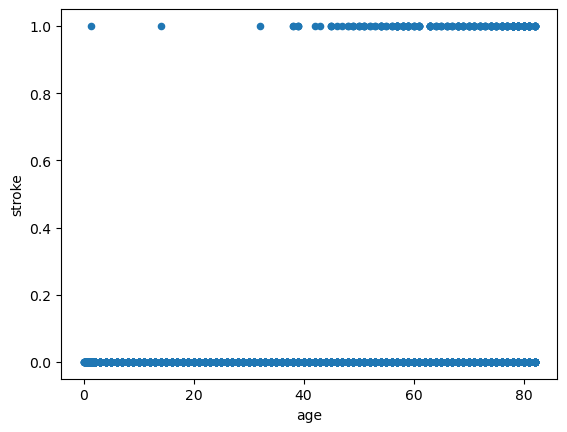

In [15]:
df.plot(x="age", y="stroke", kind="scatter")

In [16]:
df["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [17]:
df["age_cat"] = pd.cut( df["age"], bins = [0,25,45,61,100], labels = ["Young","Adult","Middle-aged","Old"] )

In [18]:
df["age_cat"].value_counts()

age_cat
Adult          1325
Young          1293
Middle-aged    1264
Old            1228
Name: count, dtype: int64

In [19]:
df.groupby("age_cat", observed=True)["stroke"].mean()

age_cat
Young          0.001547
Adult          0.008302
Middle-aged    0.051424
Old            0.139251
Name: stroke, dtype: float64

In [20]:
df.groupby("heart_disease")["stroke"].mean()

heart_disease
0    0.041787
1    0.170290
Name: stroke, dtype: float64

In [21]:
df.groupby(["heart_disease","hypertension", "ever_married"])["stroke"].mean()

heart_disease  hypertension  ever_married
0              0             No              0.008923
                             Yes             0.049283
               1             No              0.159091
                             Yes             0.117949
1              0             No              0.130435
                             Yes             0.164021
               1             No              0.444444
                             Yes             0.163636
Name: stroke, dtype: float64

# Build and assess a simple classifier

In [22]:
df["prediction"] = df["age"] > 25

In [23]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat,prediction
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Old,True
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Middle-aged,True
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Old,True
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle-aged,True
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Old,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Old,True
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Old,True
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Adult,True
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Middle-aged,True


For more information on classifier metrics, see:

https://en.wikipedia.org/wiki/Precision_and_recall

In [ ]:
# import sys
# !{sys.executable} -m pip install scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix( df["stroke"], df["prediction"])
cm

In [ ]:
ConfusionMatrixDisplay( cm, display_labels=["no stroke","stroke"]).plot()

In [ ]:
tn, fp, fn, tp = confusion_matrix( df["stroke"], df["prediction"]).ravel()
tn, fp, fn, tp

In [ ]:
import sklearn.metrics as metrics

In [ ]:
metrics.recall_score( df["stroke"], df["prediction"])

In [ ]:
tp / (tp + fn)

In [ ]:
metrics.precision_score( df["stroke"], df["prediction"])

In [ ]:
tp / (tp + fp)

In [ ]:
def precision_vs_recall( threshold ):
  df["prediction"] = df["age"] > threshold
  return metrics.precision_score( df["stroke"], df["prediction"]), metrics.recall_score( df["stroke"], df["prediction"])

In [ ]:
precision_vs_recall( 61 )

In [ ]:
precisions = []
recalls = []
thresholds = range(0,82)
for threshold in thresholds:
  precision, recall = precision_vs_recall( threshold )
  precisions.append( precision )
  recalls.append( recall )

In [ ]:
pr = pd.DataFrame( {
    "threshold": thresholds,
    "precision": precisions,
    "recall": recalls
})

In [ ]:
pr.tail()

In [ ]:
pr.plot( x="threshold", y=["precision","recall"]);

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [ ]:
train_set.columns

In [ ]:
train_set = train_set[["gender","age","hypertension","heart_disease","smoking_status","stroke"]]

In [ ]:
test_set = test_set[["gender","age","hypertension","heart_disease","smoking_status","stroke"]]

In [ ]:
X_train = train_set[["gender","age","hypertension","heart_disease","smoking_status"]]
y_train = train_set["stroke"]

In [ ]:
X_test = test_set[["gender","age","hypertension","heart_disease","smoking_status"]]
y_test = test_set["stroke"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [ ]:
num_attributes = X_train.select_dtypes( include = ['int64','float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [ ]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [ ]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [ ]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
model = pipeline.fit( X_train, y_train )
model

In [ ]:
predictions = pipeline.predict( X_test )

In [ ]:
cm = confusion_matrix( y_test, predictions )

In [ ]:
cm

In [ ]:
plot_tree( pipeline.named_steps['clf'])